In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

%matplotlib inline 

In [5]:
fxy = lambda x, y: 0.3*x**2 + 0.5*y**2
pfx = lambda x: 0.6*x
pfy = lambda y: y

Fxy = np.vectorize(fxy)
pFx = np.vectorize(pfx)
pFy = np.vectorize(pfy)

<IPython.core.display.Javascript object>


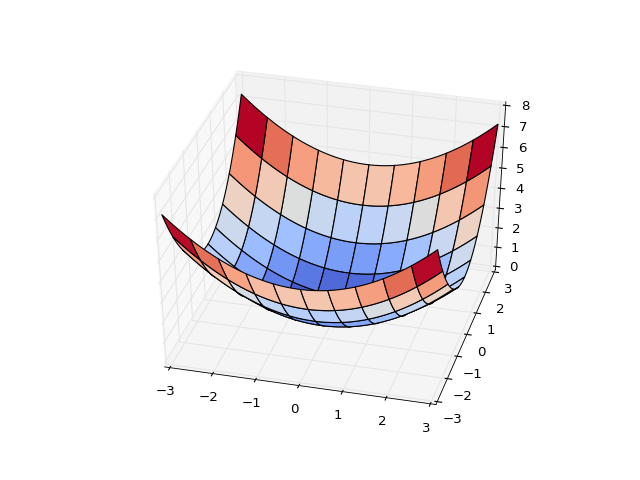

In [521]:
x, y = np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
z = Fxy(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(x, y, z, cmap = plt.cm.coolwarm)

In [496]:
x0, y0 = -3, 2
fxy(x0, y0)

4.699999999999999

In [505]:
alpha = 0.05
x0 = x0 - alpha * pfx(x0)
y0 = y0 - alpha * pfy(y0)
fxy(x0, y0)

2.354897045782648

In [31]:
class Roll(object):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def update_pos(self, delta_x, delta_y, delta_z):
        self.x.append(delta_x)
        self.y.append(delta_y)
        self.z.append(delta_z)
        
    def pos_out(self):
        return (self.x[-1], self.y[-1], self.z[-1])
    
    def remove_points(self):
        self.x = self.y = self.z = []

In [170]:
roll_1 = Roll(x=[3], y=[2], z=[fxy(3, 2)])

(1.8427609603880575, 0.88025333730353139, 1.406153356056097)


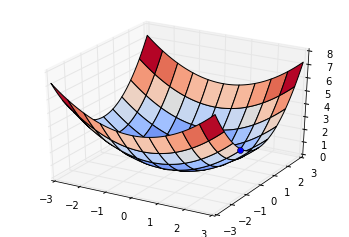

In [187]:
# Setting the 'gradient roller'

x, y = np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
z = Fxy(x, y)

print(roll_1.pos_out())
xp, yp, zp = roll_1.pos_out()

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(x, y, z, cmap = plt.cm.coolwarm)
ax.plot3D([xp], [yp], [zp], "o");

alpha = 0.05
xp = xp - alpha * pfx(xp)
yp = yp - alpha * pfy(yp)
zp = fxy(xp, yp)
roll_1.update_pos(xp, yp, zp)

# Correlation Plot

In [ ]:
from plotly.plotly import iplot, sign_in
import pickle
import pandas as pd

with open("../data/trained_cf.pickle", "rb") as in_model:
    prediction = pickle.load(in_model)

pred = pd.DataFrame(prediction[:,[-2, -1]], df_show.artist, columns=["ger", "carla"])
pred = pred[~pd.isnull(pred.index)]

with open("../data/key.txt") as k:
    key = k.readline()[:-1]
    
sign_in("ger94", key)

fig = {"data":[{
            "x": pred.ger,
            "y": pred.carla,
            "text": pred.index,
            "mode": "markers"
        }]}

iplot(fig, filename = "corr")